In [9]:
from setup_notebook import setup_project_path
setup_project_path()
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [10]:
df_new_sep = pd.read_csv("../output/predictions_new_kpi_sep_360_days_2025-09-19.csv")
df_new_sep["date_uploaded"] = "2025-09-01"

df_new_aug = pd.read_csv("../output/predictions_new_kpi_aug_360_days_2025-09-19.csv")
df_new_aug["date_uploaded"] = "2025-08-01"
df_new_aug.head()

,pred_prim_key,accounts_group,count_units,reg_month,country,area,primary_product,product_group,backtesting_unit_age_days,frr_prediction_10,frr_prediction_50,frr_prediction_80,predicted_revenue_3_years_10,predicted_revenue_3_years_50,predicted_revenue_3_years_80,total_follow_on_revenue_current_usd,date_uploaded
0,2016-01_Kenya_Lanterns_Kakamega_Sun King Pro E...,2016-01_Kenya_Lanterns_Kakamega_Sun King Pro E...,57,2016-01,Kenya,Kakamega,Sun King Pro EasyBuy,Lanterns,360,0.971373,0.984245,0.973307,1499.10,1518.97,1502.09,1543.281498,2025-08-01
1,2016-02_Kenya_Lanterns_Bungoma_Sun King Pro Ea...,2016-02_Kenya_Lanterns_Bungoma_Sun King Pro Ea...,18,2016-02,Kenya,Bungoma,Sun King Pro EasyBuy,Lanterns,360,0.892442,0.920153,0.928462,434.93,448.44,452.49,487.352052,2025-08-01
2,2016-02_Kenya_Lanterns_Kakamega_Sun King Pro E...,2016-02_Kenya_Lanterns_Kakamega_Sun King Pro E...,287,2016-02,Kenya,Kakamega,Sun King Pro EasyBuy,Lanterns,360,0.950737,0.961316,0.961045,7387.75,7469.96,7467.85,7770.557718,2025-08-01
3,2016-03_Kenya_Lanterns_Bungoma_Sun King Pro Ea...,2016-03_Kenya_Lanterns_Bungoma_Sun King Pro Ea...,114,2016-03,Kenya,Bungoma,Sun King Pro EasyBuy,Lanterns,360,0.913800,0.922764,0.948667,2820.50,2848.17,2928.12,3086.562996,2025-08-01
4,2016-03_Kenya_Lanterns_Kakamega_Sun King Pro E...,2016-03_Kenya_Lanterns_Kakamega_Sun King Pro E...,142,2016-03,Kenya,Kakamega,Sun King Pro EasyBuy,Lanterns,360,0.940154,0.945557,0.952192,3614.58,3635.35,3660.86,3844.666188,2025-08-01


In [11]:
df_new_sep[df_new_sep['accounts_group']=='2024-05_Kenya_Lanterns_Kakamega_Sun King Pro EasyBuy'].T

,153075
pred_prim_key,2024-05_Kenya_Lanterns_Kakamega_Sun King Pro E...
accounts_group,2024-05_Kenya_Lanterns_Kakamega_Sun King Pro E...
count_units,58
reg_month,2024-05
country,Kenya
area,Kakamega
primary_product,Sun King Pro EasyBuy
product_group,Lanterns
backtesting_unit_age_days,360
frr_prediction_10,0.435029


In [12]:
df_new_aug[df_new_aug['accounts_group']=='2024-05_Kenya_Lanterns_Kakamega_Sun King Pro EasyBuy'].T

,152812
pred_prim_key,2024-05_Kenya_Lanterns_Kakamega_Sun King Pro E...
accounts_group,2024-05_Kenya_Lanterns_Kakamega_Sun King Pro E...
count_units,58
reg_month,2024-05
country,Kenya
area,Kakamega
primary_product,Sun King Pro EasyBuy
product_group,Lanterns
backtesting_unit_age_days,360
frr_prediction_10,0.209358


In [13]:
df_new_aug.backtesting_unit_age_days.unique()

array([360])

In [14]:
df = pd.concat([df_new_sep, df_new_aug])
print(df.shape)
df["date_uploaded"] = pd.to_datetime(df["date_uploaded"], format="%Y-%m-%d")
df["reg_month"] = pd.to_datetime(df["reg_month"], format="%Y-%m")


(332439, 17)


In [15]:
df2 = df.groupby(["country", "product_group","reg_month", "date_uploaded"]).agg(
    count_average=("count_units", lambda x: int(x.mean())),
    predicted_fr = ("predicted_revenue_3_years_50", "sum"),
    total_fr = ("total_follow_on_revenue_current_usd", "sum")
).reset_index()
df2["predicted_frr_updated"] = df2.predicted_fr/df2.total_fr
df2 = df2.drop(['total_fr', 'predicted_fr'], axis=1)
products = ["Lanterns", "Phones", "SHS Entry-Level", "SHS with TV", "SHS without TV", "SHS Entry-Level Upgrade", "SHS with TV Upgrade"]
df2 = df2[df2.product_group.isin(products)]
df2

,country,product_group,reg_month,date_uploaded,count_average,predicted_frr_updated
25,Cameroon,SHS Entry-Level,2022-11-01,2025-08-01,3,0.801780
26,Cameroon,SHS Entry-Level,2022-11-01,2025-09-01,3,0.801780
27,Cameroon,SHS Entry-Level,2022-12-01,2025-08-01,5,0.946246
28,Cameroon,SHS Entry-Level,2022-12-01,2025-09-01,5,0.946246
29,Cameroon,SHS Entry-Level,2023-01-01,2025-08-01,4,0.898509
...,...,...,...,...,...,...
5923,Zambia,SHS without TV,2024-06-01,2025-08-01,46,0.988428
5924,Zambia,SHS without TV,2024-06-01,2025-09-01,46,0.988428
5925,Zambia,SHS without TV,2024-07-01,2025-08-01,44,0.993539
5926,Zambia,SHS without TV,2024-07-01,2025-09-01,44,0.993463


In [16]:
uad = 360
accounts_group = '2019-05_Kenya_Lanterns_' # Keep the underscore at the end.
df2[(df2['product_group']=='SHS with TV') & (df2['reg_month']=='2020-05-01') & (df2['country']=='Kenya')]


,country,product_group,reg_month,date_uploaded,count_average,predicted_frr_updated
1518,Kenya,SHS with TV,2020-05-01,2025-08-01,1,0.956075
1519,Kenya,SHS with TV,2020-05-01,2025-09-01,1,0.956073


In [17]:
df2

,country,product_group,reg_month,date_uploaded,count_average,predicted_frr_updated
25,Cameroon,SHS Entry-Level,2022-11-01,2025-08-01,3,0.801780
26,Cameroon,SHS Entry-Level,2022-11-01,2025-09-01,3,0.801780
27,Cameroon,SHS Entry-Level,2022-12-01,2025-08-01,5,0.946246
28,Cameroon,SHS Entry-Level,2022-12-01,2025-09-01,5,0.946246
29,Cameroon,SHS Entry-Level,2023-01-01,2025-08-01,4,0.898509
...,...,...,...,...,...,...
5923,Zambia,SHS without TV,2024-06-01,2025-08-01,46,0.988428
5924,Zambia,SHS without TV,2024-06-01,2025-09-01,46,0.988428
5925,Zambia,SHS without TV,2024-07-01,2025-08-01,44,0.993539
5926,Zambia,SHS without TV,2024-07-01,2025-09-01,44,0.993463


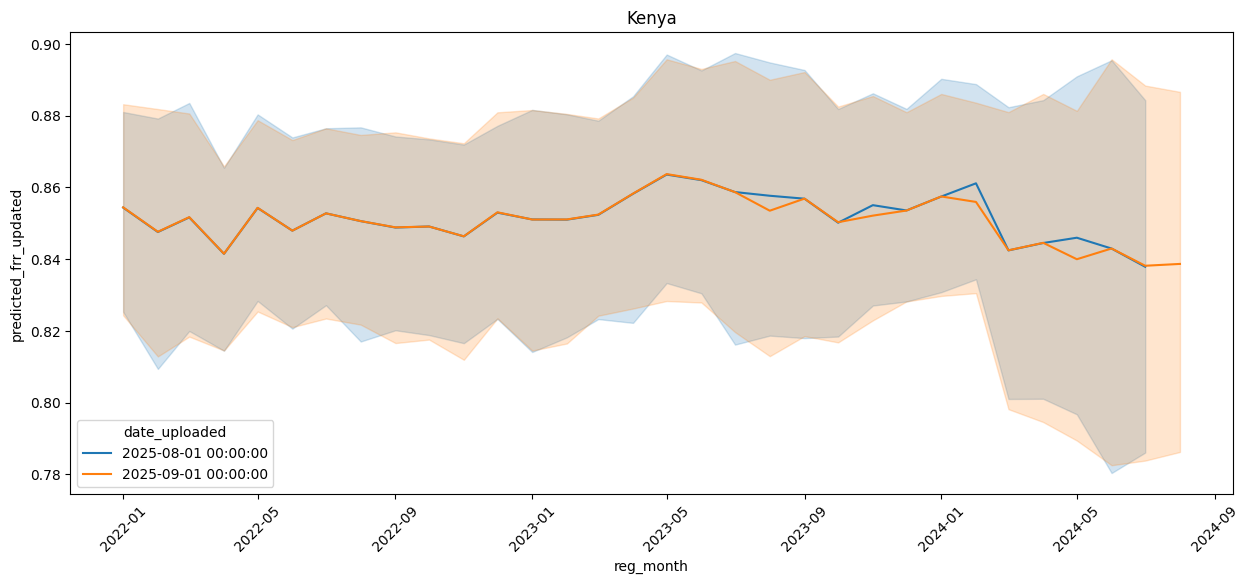

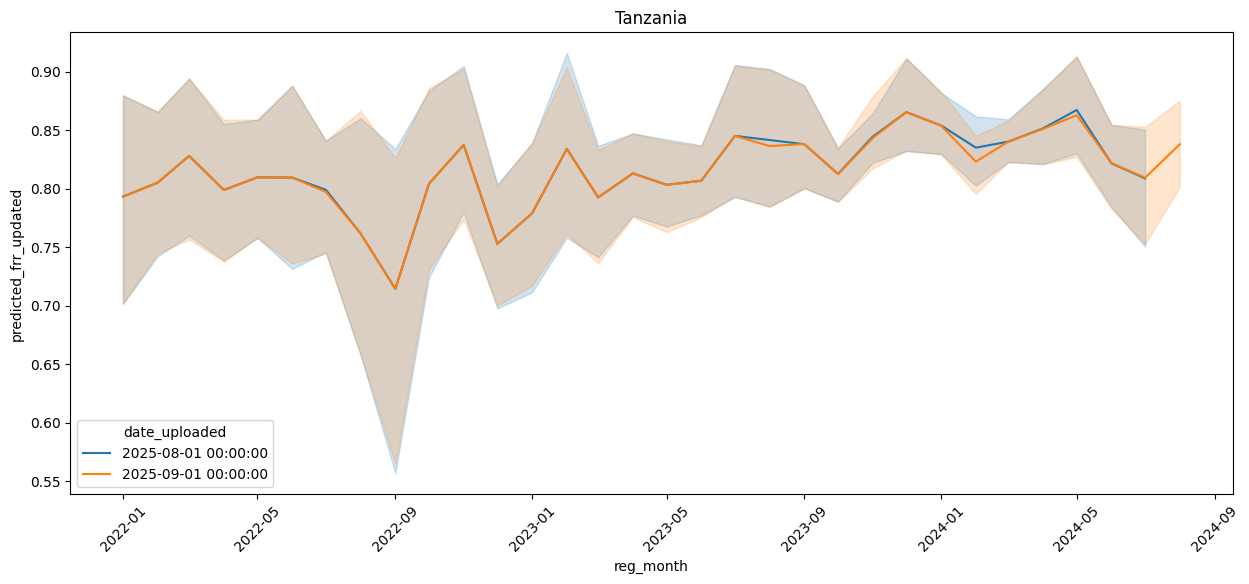

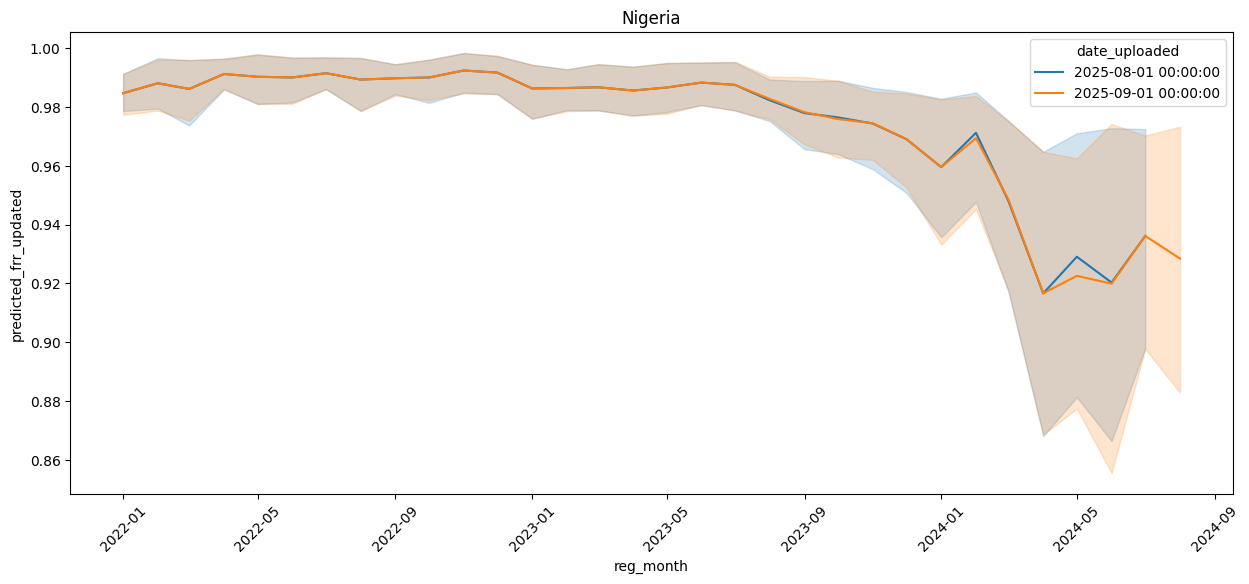

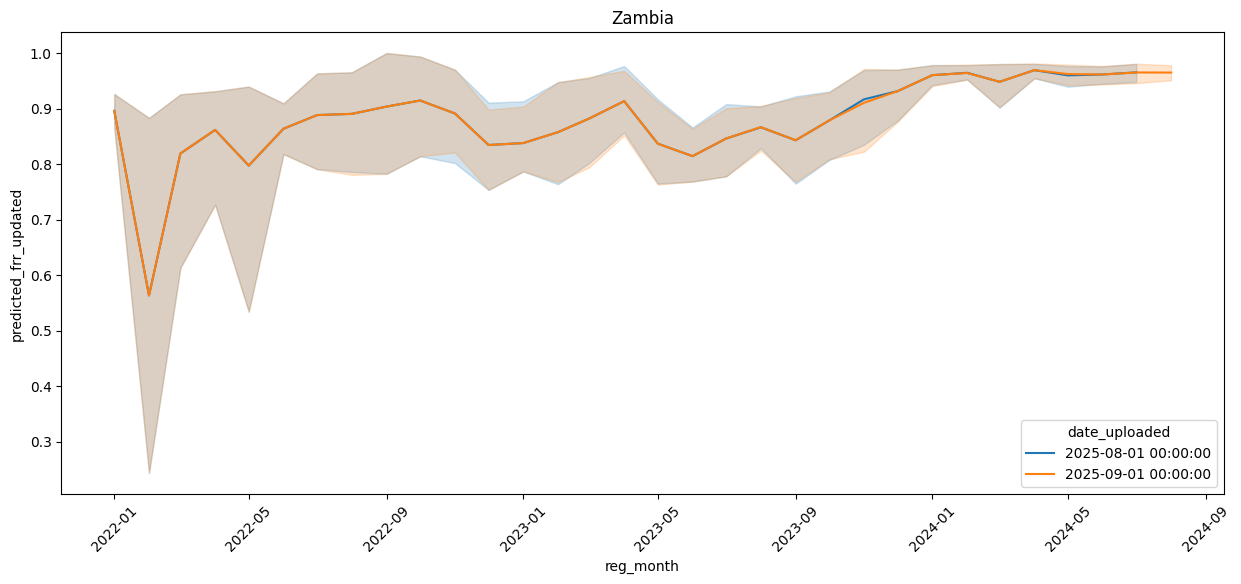

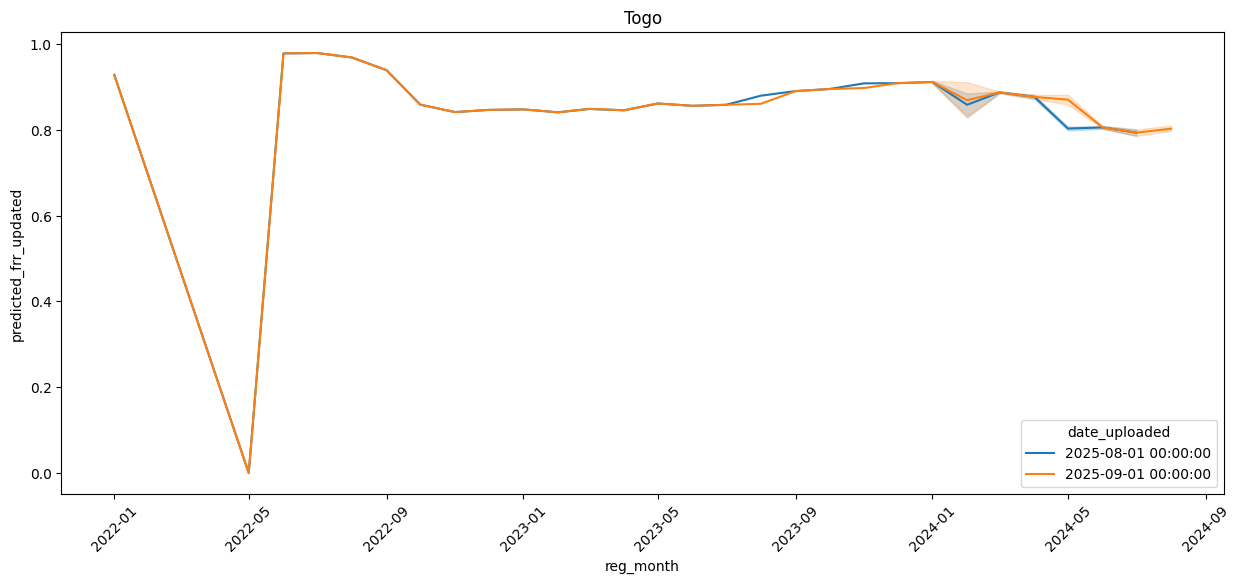

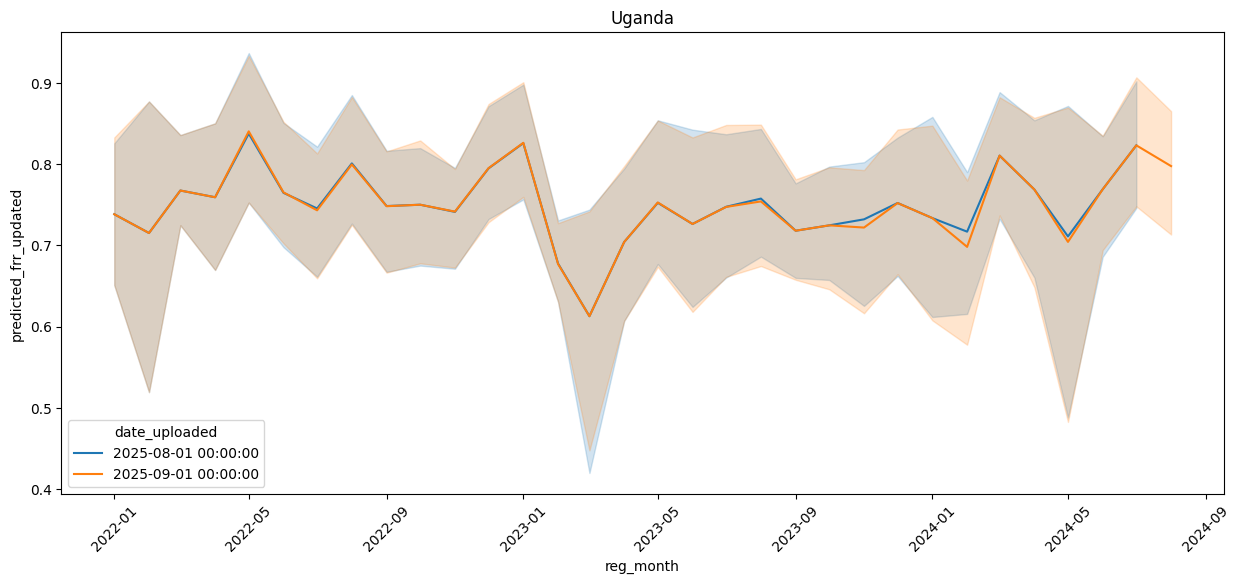

In [18]:
for country in ["Kenya", "Tanzania", "Nigeria", "Zambia", "Togo", "Uganda"]:
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=df2[(df2.country==country) & (df2.reg_month>="2022-01-01")], x="reg_month", y="predicted_frr_updated",\
                  hue="date_uploaded")
    # sns.lineplot(data=df2, x="reg_month", y="frr_prediction_50")
    plt.xticks(rotation=45)
    plt.title(country)
    plt.show()

In [19]:
pivoted = df2.pivot_table(
    index=["country", "product_group","reg_month",],
    columns="date_uploaded",
    values=["predicted_frr_updated", "count_average"]
).reset_index()
pivoted.columns = [
    str(c[0]) if c[1] == "" or pd.isna(c[1]) else f"{c[0]}_{c[1].date()}"
    for c in pivoted.columns.to_flat_index()
]
pivoted["reg_month"] = pd.to_datetime(pivoted["reg_month"])

pivoted["diff"] = pivoted["predicted_frr_updated_2025-09-01"] - pivoted["predicted_frr_updated_2025-08-01"]
pivoted.head()

,country,product_group,reg_month,count_average_2025-08-01,count_average_2025-09-01,predicted_frr_updated_2025-08-01,predicted_frr_updated_2025-09-01,diff
0,Cameroon,SHS Entry-Level,2022-11-01,3.0,3.0,0.801780,0.801780,0.0
1,Cameroon,SHS Entry-Level,2022-12-01,5.0,5.0,0.946246,0.946246,0.0
2,Cameroon,SHS Entry-Level,2023-01-01,4.0,4.0,0.898509,0.898509,0.0
3,Cameroon,SHS Entry-Level,2023-02-01,4.0,4.0,0.971824,0.971824,0.0
4,Cameroon,SHS Entry-Level,2023-03-01,8.0,8.0,0.957891,0.957891,0.0


In [20]:

backtestings = np.array([30, 60, 90, 180, 270, 360, 450, 540, 630, 720], dtype=int)
months = backtestings // 30

base_current = pd.to_datetime("2025-09-01")
base_prev = pd.to_datetime("2025-08-01")

backtesting_month_current = [base_current - pd.DateOffset(months=m+1) for m in months]
backtesting_month_prev = [base_prev - pd.DateOffset(months=m+2) for m in months]

data = {
    "Months": months,
    "backtesting_month_current": backtesting_month_current,
    "backtesting_month_prev": backtesting_month_prev,
    "backtesting_shift": backtestings,
}
backtestings_df = pd.DataFrame(data)

print(backtestings_df)


   Months backtesting_month_current backtesting_month_prev  backtesting_shift
0       1                2025-07-01             2025-05-01                 30
1       2                2025-06-01             2025-04-01                 60
2       3                2025-05-01             2025-03-01                 90
3       6                2025-02-01             2024-12-01                180
4       9                2024-11-01             2024-09-01                270
5      12                2024-08-01             2024-06-01                360
6      15                2024-05-01             2024-03-01                450
7      18                2024-02-01             2023-12-01                540
8      21                2023-11-01             2023-09-01                630
9      24                2023-08-01             2023-06-01                720


In [21]:
discrepancies = pd.merge(left=pivoted, right=backtestings_df, left_on="reg_month", right_on="backtesting_month_current", how="left")
discrepancies["backtesting_shift"] = discrepancies["backtesting_shift"].astype("Int64")
discrepancies = discrepancies[discrepancies.backtesting_shift.isin([450, 540, 630, 720])]

# discrepancies["diff"] = (discrepancies["predicted_frr_updated_2025-08"] - discrepancies["predicted_frr_updated_2025-07"]).round(4)*100

In [22]:
aa = discrepancies[discrepancies.country=="Kenya"]
aa[aa["diff"] == aa["diff"].max()]

,country,product_group,reg_month,count_average_2025-08-01,count_average_2025-09-01,predicted_frr_updated_2025-08-01,predicted_frr_updated_2025-09-01,diff,Months,backtesting_month_current,backtesting_month_prev,backtesting_shift
682,Kenya,SHS with TV Upgrade,2024-05-01,3.0,3.0,0.779101,0.793158,0.014057,15.0,2024-05-01,2024-03-01,450


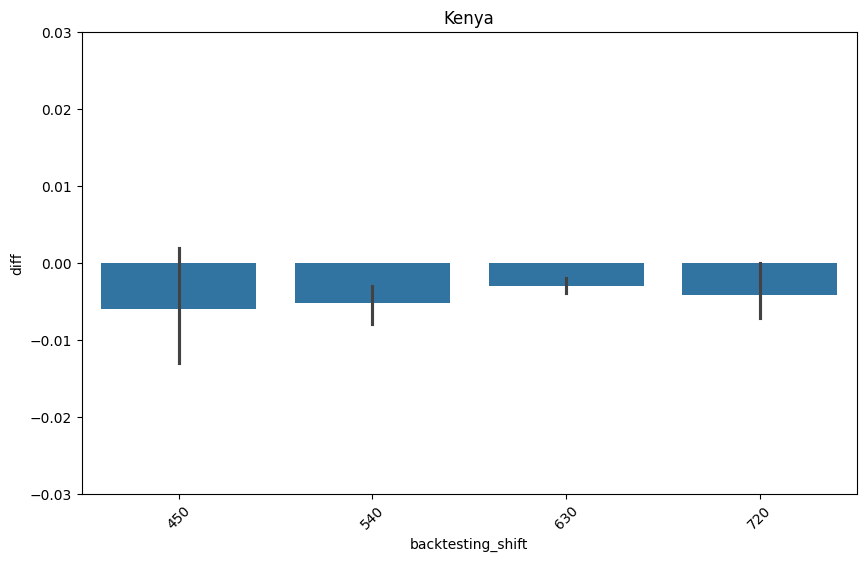

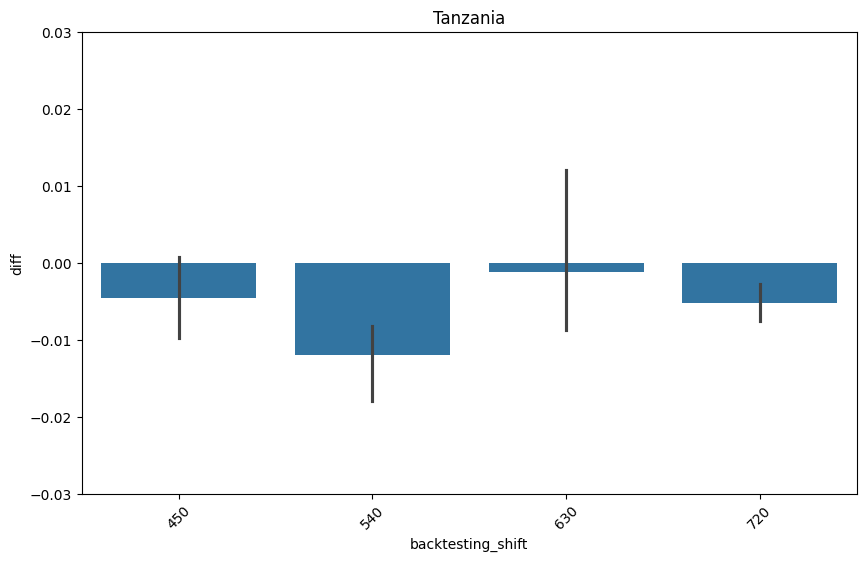

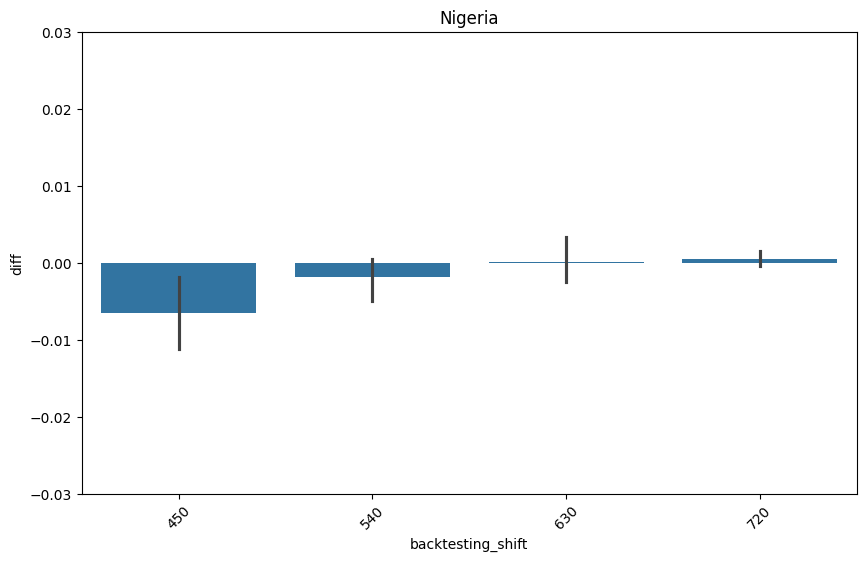

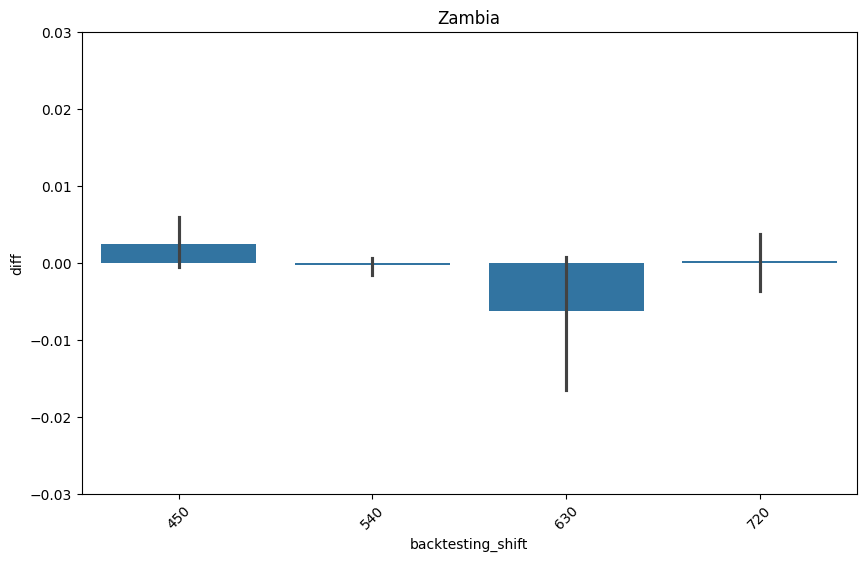

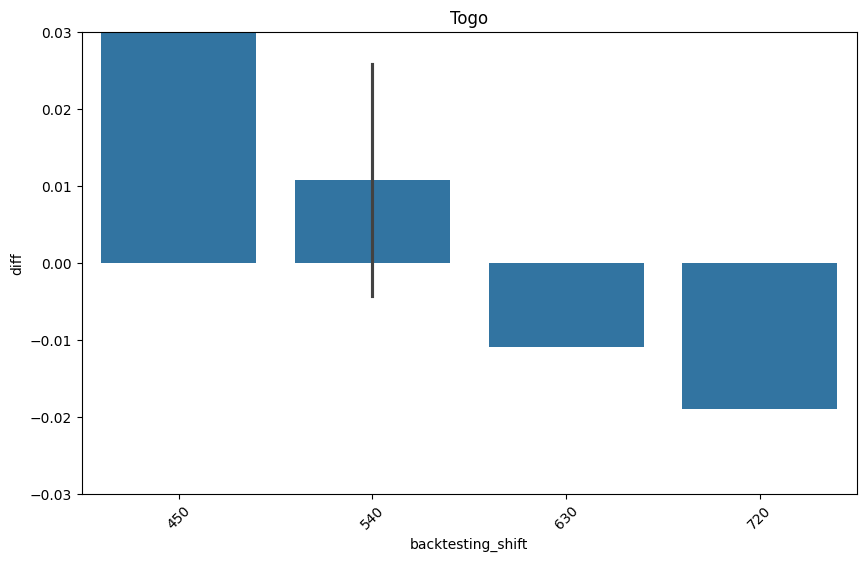

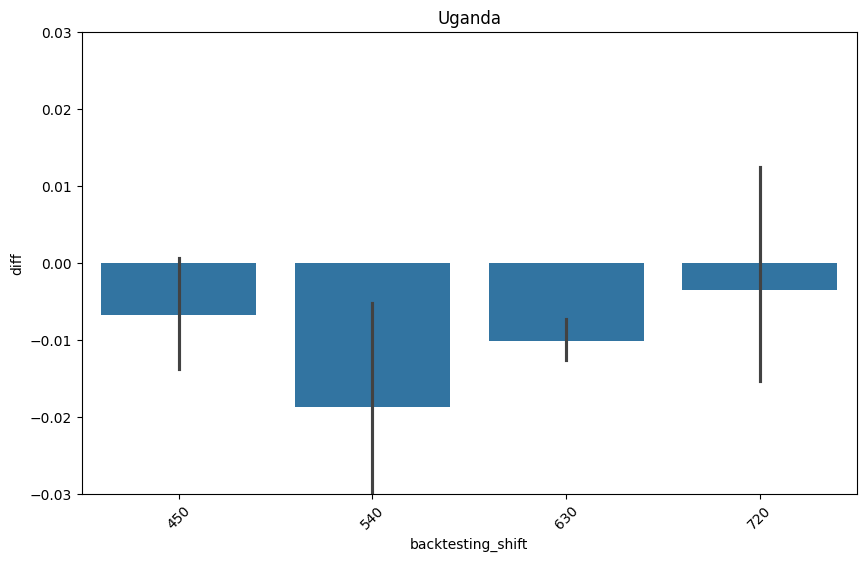

In [23]:
for country in ["Kenya", "Tanzania", "Nigeria", "Zambia", "Togo", "Uganda"]:
    plt.figure(figsize=(10, 6))
    plt.ylim((-0.03, 0.03))
    sns.barplot(data=discrepancies[discrepancies.country==country], x="backtesting_shift", y="diff")
    # sns.lineplot(data=df2, x="reg_month", y="frr_prediction_50")
    plt.xticks(rotation=45)
    plt.title(country)
    plt.show()

In [24]:
discrepancies.groupby(["country"])["diff"].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Cameroon,12.0,-0.010133,0.016528,-0.044495,-0.015844,-0.003847,0.000057,0.007297
India,5.0,-0.007182,0.003186,-0.012006,-0.007665,-0.007264,-0.005621,-0.003354
Kenya,28.0,-0.004570,0.006400,-0.017741,-0.007947,-0.004554,-0.002311,0.014057
Malawi,13.0,-0.000870,0.004281,-0.011046,-0.002624,-0.001223,0.001522,0.004962
Mozambique,12.0,-0.007652,0.008559,-0.018675,-0.013627,-0.007491,-0.003523,0.010490
Myanmar (Burma),9.0,0.000954,0.002914,-0.001556,-0.000393,0.000036,0.001540,0.008097
Nigeria,20.0,-0.001921,0.004626,-0.012717,-0.002244,-0.000992,0.000498,0.005678
South Africa,2.0,0.007113,0.009147,0.000645,0.003879,0.007113,0.010347,0.013581
Tanzania,28.0,-0.005707,0.010551,-0.028368,-0.009662,-0.007108,-0.005389,0.038068


In [25]:
discrepancies

,country,product_group,reg_month,count_average_2025-08-01,count_average_2025-09-01,predicted_frr_updated_2025-08-01,predicted_frr_updated_2025-09-01,diff,Months,backtesting_month_current,backtesting_month_prev,backtesting_shift
9,Cameroon,SHS Entry-Level,2023-08-01,24.0,24.0,0.907154,0.908870,0.001715,24.0,2023-08-01,2023-06-01,720
12,Cameroon,SHS Entry-Level,2023-11-01,42.0,42.0,0.935728,0.938636,0.002908,21.0,2023-11-01,2023-09-01,630
15,Cameroon,SHS Entry-Level,2024-02-01,18.0,18.0,0.949527,0.947955,-0.001573,18.0,2024-02-01,2023-12-01,540
18,Cameroon,SHS Entry-Level,2024-05-01,38.0,38.0,0.940587,0.935989,-0.004597,15.0,2024-05-01,2024-03-01,450
24,Cameroon,SHS with TV,2023-08-01,2.0,2.0,0.737215,0.692721,-0.044495,24.0,2023-08-01,2023-06-01,720
...,...,...,...,...,...,...,...,...,...,...,...,...
2405,Zambia,SHS with TV Upgrade,2024-05-01,3.0,3.0,0.914899,0.925245,0.010345,15.0,2024-05-01,2024-03-01,450
2422,Zambia,SHS without TV,2023-08-01,3.0,3.0,0.883053,0.890384,0.007331,24.0,2023-08-01,2023-06-01,720
2425,Zambia,SHS without TV,2023-11-01,6.0,6.0,0.974737,0.974379,-0.000358,21.0,2023-11-01,2023-09-01,630
2428,Zambia,SHS without TV,2024-02-01,6.0,6.0,0.959091,0.956063,-0.003028,18.0,2024-02-01,2023-12-01,540
